In [22]:
#COMPUTER VISION AND IMAGE RECOGNITION TASK 
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
# import numpy as np
import PIL
# import tensorflow as tf
import os
import requests # to get image from the web
import shutil # to save it locally
import time
# from tensorflow import keras
# from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Set the path to your dataset
dataset_path = '/content/drive/MyDrive/Photographs'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Set the image dimensions
img_width, img_height = 150, 150

# Set the number of training, validation, and test samples
train_samples = 400
val_samples = 100
test_samples = 100


In [25]:
# Set the batch size
batch_size = 16

# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Generate training dataset from the images
train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)


Found 320 images belonging to 2 classes.


In [26]:
# Generate validation dataset from the images
val_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'validation'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)


Found 40 images belonging to 2 classes.


In [27]:
# Generate test dataset from the images
test_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 100 images belonging to 2 classes.


In [28]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [29]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [30]:
# Train the model
# epochs = 20  # You can experiment with different numbers of epochs
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_samples // batch_size,
#     epochs=epochs,
#     validation_data=val_generator,
#     validation_steps=val_samples // batch_size
# )

In [31]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_samples // batch_size)
print('Test accuracy:', test_acc)

6/6 [==============================] - 2s 319ms/step - loss: 0.6930 - accuracy: 0.4688
Test accuracy: 0.46875


In [32]:
# BREAK LINE OF ML TASK

In [33]:

# Train the model
initial_epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=initial_epochs,
    validation_data=val_generator,
    validation_steps=val_samples // batch_size
)

Epoch 1/20
20/25 [=======================>......] - ETA: 4s - loss: 0.7226 - accuracy: 0.5250

25/25 [==============================] - 22s 841ms/step - loss: 0.7226 - accuracy: 0.5250 - val_loss: 0.5499 - val_accuracy: 0.9000


In [34]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_samples // batch_size)
print('Test accuracy:', test_acc)

6/6 [==============================] - 2s 318ms/step - loss: 0.6037 - accuracy: 0.8333
Test accuracy: 0.8333333134651184


In [35]:
# Train for additional epochs
additional_epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=initial_epochs + additional_epochs,
    initial_epoch=initial_epochs,
    validation_data=val_generator,
    validation_steps=val_samples // batch_size
)

Epoch 21/30
20/25 [=======================>......] - ETA: 4s - loss: 0.4895 - accuracy: 0.8031

25/25 [==============================] - 22s 863ms/step - loss: 0.4895 - accuracy: 0.8031 - val_loss: 0.1854 - val_accuracy: 0.9750


In [52]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_samples // batch_size)
print('Test accuracy:', test_acc)

# Plot the training accuracy and loss curves
import matplotlib.pyplot as plt

6/6 [==============================] - 2s 398ms/step - loss: 0.3540 - accuracy: 0.8438
Test accuracy: 0.84375


In [53]:
# Get training and validation accuracy values
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [54]:
# Get training and validation loss values
training_loss = history.history['loss']
val_loss = history.history['val_loss']

In [55]:
# # Create the epochs range for plotting
# epochs_range = range(1, initial_epochs + 1)

# # Extend the epochs range for the second training phase
# epochs_range_extended = range(1, initial_epochs + additional_epochs + 1)

# # Append the accuracy and loss values from the second training phase
# training_acc.extend(history.history['accuracy'])
# val_acc.extend(history.history['val_accuracy'])
# training_loss.extend(history.history['loss'])
# val_loss.extend(history.history['val_loss'])

# Create the epochs range for plotting
epochs_range = range(1, initial_epochs + 1)

# Extend the epochs range for the second training phase
epochs_range_extended = range(initial_epochs + 1, initial_epochs + additional_epochs + 1)

# Append the accuracy and loss values from the second training phase
training_acc.extend(history.history['accuracy'][initial_epochs:])
val_acc.extend(history.history['val_accuracy'][initial_epochs:])
training_loss.extend(history.history['loss'][initial_epochs:])
val_loss.extend(history.history['val_loss'][initial_epochs:])

ValueError: ignored

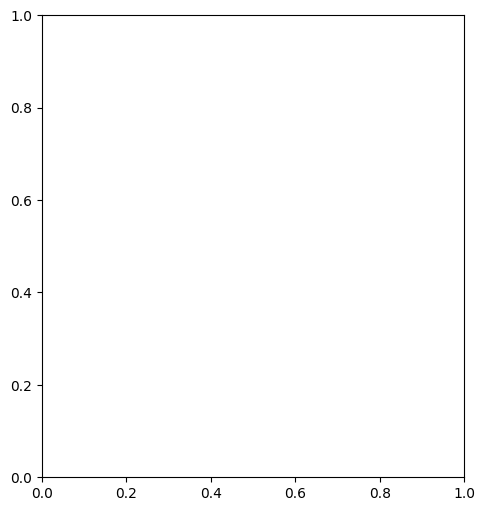

In [58]:
# Plot training and validation accuracy curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(list(epochs_range) + list(epochs_range_extended), training_acc, label='Training Accuracy')
plt.plot(list(epochs_range) + list(epochs_range_extended), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss curves
plt.subplot(1, 2, 2)
plt.plot(list(epochs_range) + list(epochs_range_extended), training_loss, label='Training Loss')
plt.plot(list(epochs_range) + list(epochs_range_extended), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()